In [158]:
import json
import csv
import re
import sys
import pandas as pd
import numpy as np
import heapq
import gensim
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import seaborn as sns
import string

# Functions
def csv_loader(PATH):
    text = pd.read_csv(PATH, names=['review','sentiment']) 
    return text


FILE_1 = 'music_dev'  # name of interim csv file. For example: # games_train
FILE_2 = 'games_val'  # name of comparison interim csv file. For example: # sew_train
FILE_NAME = 'games'
N_DIS = 100   # number of dissimilar embeddings to select
# python3 cosine.py 'music_dev' 'sew_val' 'sew' 2

In [159]:
# Load Interim CSV file and split into X and y
data_1 = csv_loader('../data/interim/' + FILE_1 + '.csv')
X_1, y_1 = data_1[['review']], data_1[['sentiment']]
X_1 = X_1[0:150]

# Load Interim CSV file and split into X and y
data_2 = csv_loader('../data/interim/' + FILE_2 + '.csv')
X_2, y_2 = data_2[['review']], data_2[['sentiment']]
X_2 = X_2[0:150]
len(X_1), len(X_2)

(150, 150)

In [171]:
stop_words = set(stopwords.words('english'))
punct = list(string.punctuation)

# Tokenize each review and lowercase everything
corp_1 = []
for i in range(len(X_1)): 
    row = X_1.iloc[i]['review']
    token_review = word_tokenize(row)
    filtered = [corp_1.append(w.lower()) for w in token_review if not w.lower() in stop_words and not w.lower() in punct]
    #corp_1.append(filtered)
all_words = list(set(corp_1))

#corp_1
#words
len(all_words)
#all_words

1546

In [181]:
corp_2 = []
for i in range(1,len(X_2)): 
    row = X_2.iloc[i]['review']
    token_review = word_tokenize(row)
    filtered = [corp_2.append(w.lower()) for w in token_review if not w.lower() in stop_words and not w.lower() in punct]

all_words = all_words + corp_2
all_words = list(set(all_words))
len(all_words)

4075

In [173]:
# Dictionary of word to index
word_to_idx = {}
idx_to_word = {}

# size of corpses
count_corp1 = len(corp_1)
count_corp2 = len(corp_2)

# Initialize Dictionaries for both corpus
dict_1 = {}
for i in range(len(all_words)):
    word_to_idx[all_words[i]] = i
    idx_to_word[i] = all_words[i]
    dict_1[word_to_idx[all_words[i]]] = 0
    
dict_2 = {}
for i in all_words:
    dict_2[word_to_idx[i]] = 0

# get word count for corpus 1
for i in corp_1:
    dict_1[word_to_idx[i]] += 1

# get word count for corpus 2
for i in corp_2:
    dict_2[word_to_idx[i]] += 1

In [180]:
max_value = max(dict_2.values())  # maximum value
max_keys = [k for k, v in dict_2.items() if v == max_value]
idx_to_word[max_keys[0]]

'game'

<AxesSubplot:>

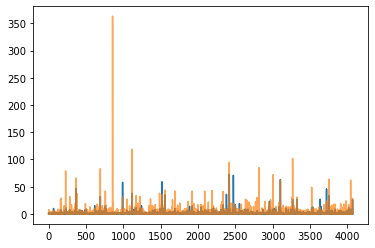

In [176]:
sns.lineplot(x=list(dict_1.keys()),y=dict_1.values())
sns.lineplot(x=list(dict_2.keys()),y=dict_2.values(), alpha=.7)

In [34]:
# dictionary of tokens
#dictionary = gensim.corpora.Dictionary(corp_1)

In [35]:
# make BOW
#corpus = [dictionary.doc2bow(gen_doc) for gen_doc in corp_1]
#corpus

In [10]:
# TFIDF to downplay frequent words
#tf_idf = gensim.models.TfidfModel(corpus)

In [12]:
# building the index
#sims = gensim.similarities.Similarity('workdir/',tf_idf[corpus],
 #                                       num_features=len(dictionary))

In [21]:
#print(f"\nAverage similarities: {avg_sims}")

In [13]:
sims_only = [sim[0] for sim in avg_sims]
sims_only = pd.DataFrame(sims_only, columns=['similarity'])
sims_only.to_csv('../data/dissimilar/'+FILE_NAME+'_sim_score.csv', index=False, header=False)


In [22]:
pq = heapq.nsmallest(N_DIS, avg_sims, key=None) # size of heap, similarity score list to iterate through
print(f"\nPriority Q: {pq})")



Priority Q: [(0.027986198663711548, 3), (0.028140783309936523, 6), (0.03472177187601725, 7), (0.03649107217788696, 1), (0.0467348059018453, 11), (0.04936017195383708, 9), (0.05054935216903687, 5), (0.054868686199188235, 4), (0.055024802684783936, 2), (0.06479088465372722, 8), (0.08770777384440104, 14), (0.09463965098063151, 13), (0.09879982471466064, 10), (0.1027657429377238, 12)])


In [23]:
most_dis = []
for tup in pq:
    most_dis.append((X_2.iloc[tup[1]]['review'], y_2.iloc[tup[1]]['sentiment'], tup[0], tup[1]))
print(f"\nMost Dissimilar Sentence: {most_dis[0]}")
most_dis = pd.DataFrame(most_dis, columns=['review','sentiment','cosine_score','orig_index'])
most_dis


Most Dissimilar Sentence: ('both daughters love it. violence and fairytales mixed together. wow. both daughters love it.', '1', 0.027986198663711548, 3)


,review,sentiment,cosine_score,orig_index
0,both daughters love it. violence and fairytale...,1,0.027986,3
1,She loves it My daughter has been crazy about ...,1,0.028141,6
2,Nice game pack. Two spectacular games. Main co...,1,0.034722,7
3,Perfect Tech gadget Every gamer should have on...,1,0.036491,1
4,Works for some people. I bought the track hat ...,0,0.046735,11
5,"You can not go wrong with this keyboard, You c...",1,0.049360,9
6,Don't buy a off brand I really like how it use...,1,0.050549,5
7,Works great to charge my controllers Works gre...,1,0.054869,4
8,"Same old stuff, but still fun. Better looking ...",1,0.055025,2
9,"Its not quite Casablanca, but its close enough...",1,0.064791,8


In [31]:
top_10 = most_dis[0:10]
top_100 = most_dis[0:100]
#top_1000 = most_dis[0:1000]
#top_10thou = most_dis[0:10000]

In [32]:
type(top_10)
top_10

,review,sentiment,cosine_score,orig_index
0,both daughters love it. violence and fairytale...,1,0.027986,3
1,She loves it My daughter has been crazy about ...,1,0.028141,6
2,Nice game pack. Two spectacular games. Main co...,1,0.034722,7
3,Perfect Tech gadget Every gamer should have on...,1,0.036491,1
4,Works for some people. I bought the track hat ...,0,0.046735,11
5,"You can not go wrong with this keyboard, You c...",1,0.049360,9
6,Don't buy a off brand I really like how it use...,1,0.050549,5
7,Works great to charge my controllers Works gre...,1,0.054869,4
8,"Same old stuff, but still fun. Better looking ...",1,0.055025,2
9,"Its not quite Casablanca, but its close enough...",1,0.064791,8


In [34]:
top_10.to_csv('test.csv', index=False, header=False)
top_10 = pd.read_csv('test.csv', names=['review','sentiment','cosine_score','orig_index'], index=False)
top_10

,review,sentiment,cosine_score,orig_index
0,both daughters love it. violence and fairytale...,1,0.027986,3
1,She loves it My daughter has been crazy about ...,1,0.028141,6
2,Nice game pack. Two spectacular games. Main co...,1,0.034722,7
3,Perfect Tech gadget Every gamer should have on...,1,0.036491,1
4,Works for some people. I bought the track hat ...,0,0.046735,11
5,"You can not go wrong with this keyboard, You c...",1,0.049360,9
6,Don't buy a off brand I really like how it use...,1,0.050549,5
7,Works great to charge my controllers Works gre...,1,0.054869,4
8,"Same old stuff, but still fun. Better looking ...",1,0.055025,2
9,"Its not quite Casablanca, but its close enough...",1,0.064791,8


# Checking out similarity scores

In [42]:
csvs = pd.read_csv('../data/dissimilar/games10000.csv')
csvs[10:20]

,satisfecho satisfecho,1,0.0,18957
10,A A,1,0.000000e+00,214729
11,clickclickclickclickclickclickclickclickclickc...,1,0.000000e+00,224545
12,Compralo Compralo,1,0.000000e+00,242056
13,fino encantado,1,0.000000e+00,253205
14,A A,1,0.000000e+00,256005
15,a a,1,0.000000e+00,311973
16,HOYLE NAAAAH,0,0.000000e+00,328496
17,a a,1,0.000000e+00,335989
18,KINOPIO KINOPIO,1,0.000000e+00,340999
19,Tr4sh Not Melee,0,6.305768e-07,43936


In [43]:
what = pd.read_csv('../data/interim/games_train.csv')


In [49]:
what[59010:59011]

,review,label
59010,a a,1


# Old Stuff

In [4]:
# 
corp_1 = []
for i in range(5): 
    row = X_1.iloc[i]['review']
    corp_1.append(row)
    
# 
corp_2 = []
for i in range(3): 
    row = X_2.iloc[i]['review']
    corp_2.append(row)
corp_2 = corp_2[1:]
corp_2

['Great sticking product Use this often.  Great sticking product.  Glad I purchased it.',
 "Very good, and the mask is good enough and perceivable ... Very good, and the mask is good enough and perceivable (it's pale green).  I wish the container had a stick attached to the cap, for convenience.  Generally I go get a couple of toothpicks to help me spread the goo around.  You could use an old brush that you have no further use for."]

In [21]:
count_vectorizer = TfidfVectorizer(stop_words='english')

TfidfVectorizer(stop_words='english')

In [23]:
sparse_matrix_1 = count_vectorizer.fit_transform(corp_1)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix_1 = sparse_matrix_1.todense()
df_1 = pd.DataFrame(doc_term_matrix_1, 
                  columns=count_vectorizer.get_feature_names_out())
df_1

,abe,acquainted,address,amazing,asleep,awesome,bc,big,boring,bought,...,unfortunately,unintelligible,uplifting,vinyl,visits,won,worked,world,worst,young
0,0.000000,0.000000,0.000000,0.000000,0.327465,0.000000,0.000000,0.000000,0.000000,0.132098,...,0.000000,0.000000,0.000000,0.000000,0.163733,0.000000,0.163733,0.000000,0.000000,0.000000
1,0.000000,0.188982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.188982,0.000000,...,0.188982,0.188982,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.188982
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.183646,0.000000,0.183646,0.000000,0.183646,0.000000,0.000000,...,0.000000,0.000000,0.183646,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.155691,0.000000,0.311382,0.000000,0.000000,0.000000,0.155691,0.000000,0.000000,0.125611,...,0.000000,0.000000,0.000000,0.155691,0.000000,0.155691,0.000000,0.155691,0.155691,0.000000


In [14]:
sparse_matrix_2 = count_vectorizer.fit_transform(corp_2)

# OPTIONAL: Convert Sparse Matrix to Pandas Dataframe if you want to see the word frequencies.
doc_term_matrix_2 = sparse_matrix_2.todense()
df_2 = pd.DataFrame(doc_term_matrix_2, 
                  columns=count_vectorizer.get_feature_names_out())
df_2

,12,12ml,24,artistic,aware,bit,bought,boxes,case,cedar,...,qty,ranges,run,set,single,small,stars,time,using,work
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.5,0.000000,0.000000,0.000000
1,0.116248,0.116248,0.116248,0.116248,0.116248,0.0,0.116248,0.116248,0.116248,0.116248,...,0.116248,0.116248,0.116248,0.697486,0.116248,0.232495,0.0,0.232495,0.116248,0.116248


In [16]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
print(cosine_similarity(df_1, df_2))

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 108 while Y.shape[1] == 34